# Superlinked exercise 

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

## Loading in the data

In [31]:
MOVIE_DATA = "https://storage.googleapis.com/superlinked-notebook-netflix-shows-dataset/netflix_movies_single_genre.csv"
df = pd.read_csv(MOVIE_DATA, index_col=0)

### Basic EDA
viewing the data we see both movies and shows and other meta data describing the entries such as genre an, run time,

In [14]:
df.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'production_countries', 'seasons',
       'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score',
       'genre'],
      dtype='object')

In [32]:
df.head(3)

,id,title,type,description,release_year,age_certification,runtime,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genre
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['US'],1.0,NaN,NaN,NaN,0.600,NaN,documentation
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179,crime
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300,action


In [11]:
df.shape
#15 featuures and around 5800 entries


(5791, 15)

In [12]:
df.info()
# reviewing the features

<class 'pandas.core.frame.DataFrame'>
Index: 5791 entries, 0 to 5790
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5791 non-null   object 
 1   title                 5791 non-null   object 
 2   type                  5791 non-null   object 
 3   description           5781 non-null   object 
 4   release_year          5791 non-null   int64  
 5   age_certification     3204 non-null   object 
 6   runtime               5791 non-null   int64  
 7   production_countries  5791 non-null   object 
 8   seasons               2081 non-null   float64
 9   imdb_id               5438 non-null   object 
 10  imdb_score            5362 non-null   float64
 11  imdb_votes            5348 non-null   float64
 12  tmdb_popularity       5709 non-null   float64
 13  tmdb_score            5507 non-null   float64
 14  genre                 5791 non-null   object 
dtypes: float64(5), int64(2), o

In [34]:
#no missing values
df.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5791.000000,5791.000000,2081.000000,5362.000000,5.348000e+03,5709.000000,5507.000000
mean,2016.402694,77.238473,2.172513,6.510034,2.345576e+04,22.813653,6.827855
std,6.953347,38.965029,2.701946,1.163396,9.585441e+04,82.014106,1.164815
min,1945.000000,0.000000,1.000000,1.500000,5.000000e+00,0.055091,0.500000
25%,2016.000000,44.000000,1.000000,5.800000,5.177500e+02,2.784000,6.100000
50%,2018.000000,83.000000,1.000000,6.600000,2.234500e+03,6.887000,6.900000
75%,2020.000000,105.000000,2.000000,7.300000,9.500250e+03,16.738000,7.500000
max,2022.000000,240.000000,42.000000,9.500000,2.294231e+06,2274.044000,10.000000


In [35]:

#no missing values
df.isnull().sum()

id                         0
title                      0
type                       0
description               10
release_year               0
age_certification       2587
runtime                    0
production_countries       0
seasons                 3710
imdb_id                  353
imdb_score               429
imdb_votes               443
tmdb_popularity           82
tmdb_score               284
genre                      0
dtype: int64

## Question 1: 
-Identify a release year with the largest number of movies.

In [23]:
df.type.values

array(['SHOW', 'MOVIE', 'MOVIE', ..., 'MOVIE', 'MOVIE', 'SHOW'],
      dtype=object)

WE see there are both movies and shows in the dataset, lets filter only on movies

In [26]:
df_movies = df[df['type'] == 'MOVIE']
df_movies.head()
df_movies.shape
# around 3700 movies

(3710, 15)

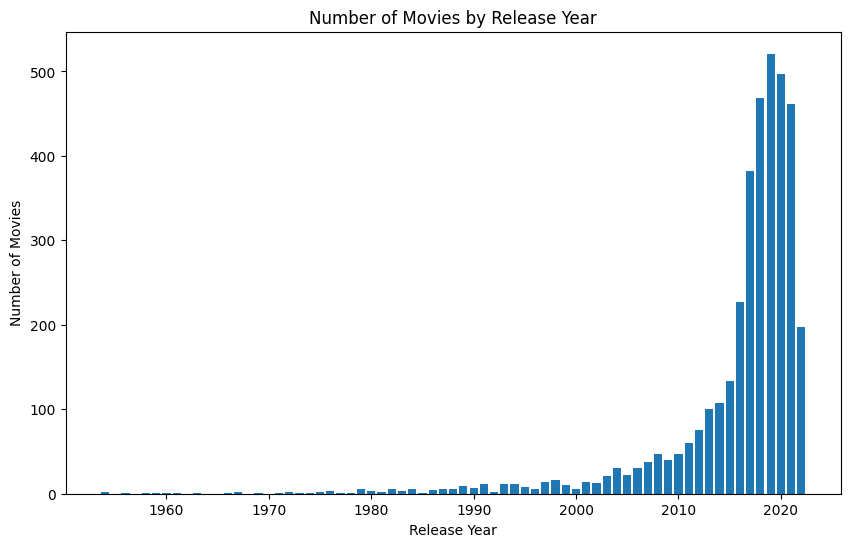

In [38]:
# Task 1: year with most movies
year_counts = df_movies.groupby("release_year").size().sort_values(ascending=False)

# plot the year counts
plt.figure(figsize=(10,6))
plt.bar(year_counts.index, year_counts.values)
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies by Release Year')
plt.show()


In [39]:
print("Top year:", year_counts.index[0], year_counts.iloc[0])

Top year: 2019 521


In [43]:
# checkng the total number of movies in 2019
df_movies[df_movies['release_year'] == 2019].shape

(521, 15)

## Question 2: 
-For each release year, identify the most frequently represented movie genre.

In [45]:
df_movies.head()
#number of relase years
df_movies.release_year.nunique()
# 62 relase years

62

In [47]:
# Task 2: most common genre per year
most_genre = df_movies.groupby("release_year")["genre"]\
               .agg(lambda x: x.value_counts().idxmax())
most_genre.head()

release_year
1954     romance
1956       drama
1958       drama
1959       crime
1960    thriller
Name: genre, dtype: object

Text(0.5, 1.0, 'Most Common Netflix Movie Genre by Release Year')

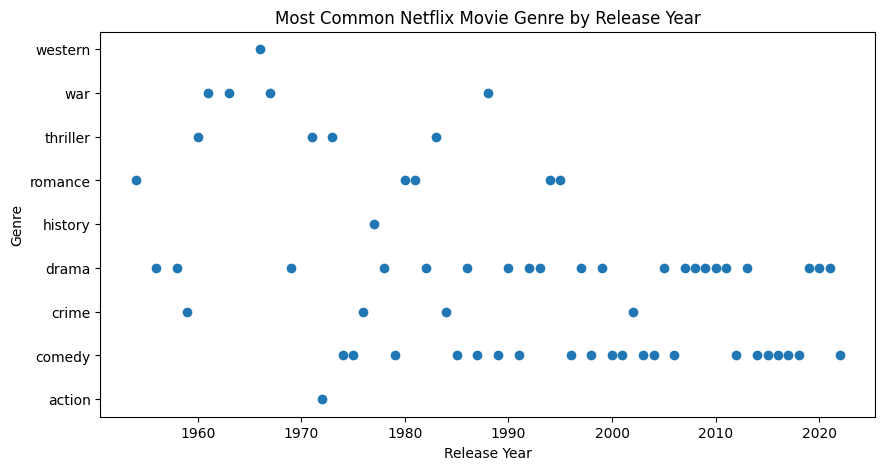

In [50]:
# Map genres to numeric codes for plotting
genre_cat = most_genre.astype("category")
codes = genre_cat.cat.codes
labels = list(genre_cat.cat.categories)

# Plot
plt.figure(figsize=(10, 5))
plt.scatter(most_genre.index, codes)
plt.yticks(range(len(labels)), labels)
plt.xlabel("Release Year")
plt.ylabel("Genre")
plt.title("Most Common Netflix Movie Genre by Release Year")

We can see from the plot above drama and comedy look to be the most prevalent and western, history action not very prevelant for the most common netflix movie by relase year

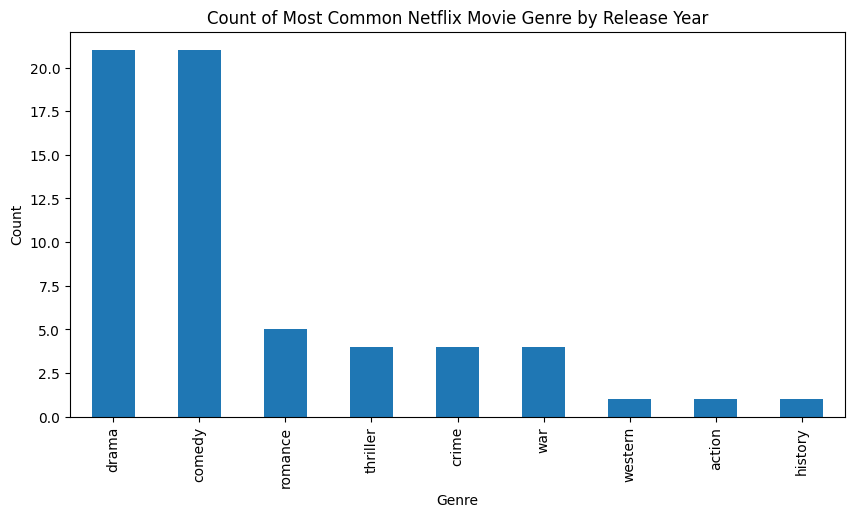

In [55]:
most_genre.value_counts()
# plot the genre counts
plt.figure(figsize=(10, 5))
most_genre.value_counts().plot(kind='bar')
plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Count of Most Common Netflix Movie Genre by Release Year")
plt.show()

## Question 3
- Train and evaluate a model that predicts the movie genre from the movie description.
- In other words, only use the movie description as a feature and the genre as a label. Start with something SIMPLE!

In [56]:
y_col = "genre"
X_col = "description"


In [93]:
df_xy= df_movies[[y_col, X_col]]
df_xy.head()

,genre,description
1,crime,A mentally unstable Vietnam War veteran works ...
2,action,Intent on seeing the Cahulawassee River before...
3,comedy,"King Arthur, accompanied by his squire, recrui..."
4,war,12 American military prisoners in World War II...
6,comedy,"Brian Cohen is an average young Jewish man, bu..."


In [94]:
df_xy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3710 entries, 1 to 5789
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   genre        3710 non-null   object
 1   description  3705 non-null   object
dtypes: object(2)
memory usage: 216.0+ KB


Can see uneven dbn of movie genres

In [95]:
df_xy['genre'].value_counts()
# we can see there is class imbalance  - ie not an even number of each genre - must be careful in train and test split

genre
drama            799
comedy           757
romance          390
documentation    252
crime            244
thriller         214
action           177
horror           168
family           153
music            118
scifi             75
war               73
animation         67
sport             63
history           56
european          55
fantasy           36
western            9
reality            4
Name: count, dtype: int64

## Checking for missing values

In [96]:
df_xy.isnull().sum()

genre          0
description    5
dtype: int64

 decide to keep it simple and drop the rows where we dont have an X, also since its a small number compared to sample size

In [97]:
df_xy_nulls_droped = df_xy.dropna()

# count len after dropping
print("Number of rows dropped:", len(df_xy) - len(df_xy_nulls_droped))


Number of rows dropped: 5


Investing our X a little further

In [98]:
df_xy.description.value_counts().sort_values(ascending=False).head(10)


description
Marta may be an orphan, and she may be affected by a lethal illness, yet she is the most positive person one can meet. She wants a boy to fall for her. Not any boy - the most handsome of them all. One day, she may have found her match.                                                                                                                                                                                                                                                          2
Richard Pryor delivers monologues on race, sex, family and his favorite target—himself, live at the Terrace Theatre in Long Beach, California.                                                                                                                                                                                                                                                                                                                                                       1
Two talented s

We can see there is duplicate value - ie same X and y

In [100]:
# mark all duplicates (including first occurrences)
mask =df_xy_nulls_droped.duplicated(subset=[X_col], keep=False)

# show both/all rows with duplicated descriptions
dup_rows = df_xy_nulls_droped[mask]
dup_rows.head()

,genre,description
3820,drama,"Marta may be an orphan, and she may be affecte..."
5522,drama,"Marta may be an orphan, and she may be affecte..."


In [101]:
df_movies.loc[[3820, 5522]]
# we can see the duplicates are actually look like a sequal ie part of the same movie series

,id,title,type,description,release_year,age_certification,runtime,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genre
3820,tm854876,Out of My League,MOVIE,"Marta may be an orphan, and she may be affecte...",2020,NaN,90,['IT'],NaN,tt11154906,6.1,2734.0,12.019,7.0,drama
5522,tm996040,Forever Out of My League,MOVIE,"Marta may be an orphan, and she may be affecte...",2022,NaN,104,['IT'],NaN,tt14362698,5.3,463.0,61.008,5.7,drama


since it is a low number lets drop this example

In [107]:
df_xy_clean = df_xy_nulls_droped.drop_duplicates(subset=["description"], keep="first")
df_xy_clean.shape


(3704, 2)

Moving on to training the model

In [115]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score

# split
X_train, X_test, y_train, y_test = train_test_split(
    df_xy_clean[X_col], df_xy_clean[y_col],
    stratify=df_xy_clean[y_col], test_size=0.2, random_state=42
)



In [109]:
# vectorize
tfidf = TfidfVectorizer(max_features=5000)
X_tr = tfidf.fit_transform(X_train)
X_te = tfidf.transform(X_test)


In [117]:
tfidf

TfidfVectorizer(max_features=5000)

In [ ]:

# train
model = LogisticRegression(max_iter=1000)
model.fit(X_tr, y_train)

# eval
y_pred = model.predict(X_te)


In [116]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))


Accuracy: 0.40620782726045884
Precision: 0.32409295963727525
Recall: 0.14605746831118885
F1 Score: 0.14965807999241995


/home/ec2-user/projects/PhenoDS/superlinked_demo/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [114]:
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

       action       0.75      0.09      0.15        35
    animation       1.00      0.08      0.14        13
       comedy       0.50      0.71      0.58       151
        crime       0.38      0.16      0.23        49
documentation       0.63      0.34      0.44        50
        drama       0.32      0.81      0.46       159
     european       0.00      0.00      0.00        11
       family       1.00      0.03      0.06        31
      fantasy       0.00      0.00      0.00         7
      history       0.00      0.00      0.00        11
       horror       0.71      0.15      0.25        33
        music       0.00      0.00      0.00        24
      reality       0.00      0.00      0.00         1
      romance       0.58      0.36      0.44        78
        scifi       0.00      0.00      0.00        15
        sport       0.00      0.00      0.00        13
     thriller       0.29      0.05      0.08        43
         

/home/ec2-user/projects/PhenoDS/superlinked_demo/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ec2-user/projects/PhenoDS/superlinked_demo/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ec2-user/projects/PhenoDS/superlinked_demo/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

Precision for a genre =
Of all movies the model labeled as that genre, how many truly belong there?

High precision means few false positives.

Recall for a genre =
Of all actual movies in that genre, how many the model correctly found?

High recall means few false negatives.

### Overall:

Accuracy 0.41 → 41% of all test movies are correctly labeled.

Macro-avg F1 0.15 → if you treat each genre equally, performance is very poor.

Weighted-avg F1 0.34 → accounts for genre frequency, still low.

It shows the model favors common classes (comedy, drama) but misses or mislabels most others.